In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
def show_grid(size):
    f_size=4
    
    plt.figure(figsize=(f_size, f_size))
    
    x=np.linspace(0,size,size+1)
    y=np.linspace(0,size,size+1)

    #draw grids
    for i in range(0,size+1):
        plt.plot([i+0.5,i+0.5],[0.5,size+0.5],'k')
        plt.plot([0.5,size+0.5],[i+0.5,i+0.5],'k')
        
        plt.xlim(0.5,size+0.5)
        plt.ylim(0.5,size+0.5)

    half_size=int(size/2)

    plt.scatter([half_size],[half_size],color='black',s=f_size*50)
    plt.scatter([half_size+1],[half_size+1],color='black',s=f_size*50)
    plt.scatter([half_size+1],[half_size],color='white',s=f_size*50)
    plt.scatter([half_size],[half_size+1],color='white',s=f_size*50)
    
    ax = plt.gca()
    ax.set_facecolor('khaki')
    
    plt.show()

In [3]:
def initial(size,black,white):
    situation=np.zeros([size,size])
    
    #(x,y) => situation[size-y,x-1]
    
    half_size=int(size/2)
    
    situation[size-half_size-1,half_size+1-1]=black  
    #(5,5) => situation[8-5,5-1]=[3,4]
    
    situation[size-half_size,half_size-1]=black  
    #(4,4) => situation[8-4,4-1]=[4,3]
    
    situation[size-half_size-1,half_size-1]=white  
    #(4,5) => situation[8-5,4-1]=[3,3]
    
    situation[size-half_size,half_size+1-1]=white  
    #(5,4) => situation[8-4,5-1]=[4,4]
    
    return situation

In [4]:
def victor_check(size,now_player,next_player,empty):
    
    position=np.array([])

    count=0
    
    for column in range(0,size):
        for row in range(0,size):
            
            if situation[row,column]==now_player:
                
                x=column+1
                y=size-row
                
                if (size-x)>=2: #向右
                    if situation[row,column+1]==next_player:
                        distance=(size-x)
                        for i in range(2,distance+1):
                            if situation[row,column+i]==now_player:
                                break
                            elif situation[row,column+i]==empty:
                                x1=column+i+1
                                y1=size-row
                                position=np.append(position,[x1,y1])
                                count=count+1
                                break 
                                
                if (x-1)>=2: #向左
                    if situation[row,column-1]==next_player:
                        distance=(x-1)
                        for i in range(2,distance+1):
                            if situation[row,column-i]==now_player:
                                break
                            elif situation[row,column-i]==empty:
                                x1=column-i+1
                                y1=size-row
                                position=np.append(position,[x1,y1])
                                count=count+1
                                break
                                
                if (size-y)>=2: #向上
                    if situation[row-1,column]==next_player:
                        distance=(size-y)
                        for i in range(2,distance+1):
                            if situation[row-i,column]==now_player:
                                break
                            elif situation[row-i,column]==empty:
                                x1=column+1
                                y1=size-row+i
                                position=np.append(position,[x1,y1])
                                count=count+1
                                break
                                
                if (y-1)>=2: #向下
                    if situation[row+1,column]==next_player:
                        distance=(y-1)
                        for i in range(2,distance+1):
                            if situation[row+i,column]==now_player:
                                break
                            elif situation[row+i,column]==empty:
                                x1=column+1
                                y1=size-row-i
                                position=np.append(position,[x1,y1])
                                count=count+1
                                break
                                
                if ((size-x)>=2) & ((size-y)>=2): #向右上
                    if situation[row-1,column+1]==next_player:
                        distance=min((size-x),(size-y))
                        for i in range(2,distance+1):
                            if situation[row-i,column+i]==now_player:
                                break
                            elif situation[row-i,column+i]==empty:
                                x1=column+i+1
                                y1=size-row+i
                                position=np.append(position,[x1,y1])
                                count=count+1
                                break
                                
                if ((size-x)>=2) & ((y-1)>=2): #向右下
                    if situation[row+1,column+1]==next_player:
                        distance=min((size-x),(y-1))
                        for i in range(2,distance+1):
                            if situation[row+i,column+i]==now_player:
                                break
                            elif situation[row+i,column+i]==empty:
                                x1=column+i+1
                                y1=size-row-i
                                position=np.append(position,[x1,y1])
                                count=count+1
                                break
                                
                if ((x-1)>=2) & ((size-y)>=2): #向左上
                    if situation[row-1,column-1]==next_player:
                        distance=min((x-1),(size-y))
                        for i in range(2,distance+1):
                            if situation[row-i,column-i]==now_player:
                                break
                            elif situation[row-i,column-i]==empty:
                                x1=column-i+1
                                y1=size-row+i
                                position=np.append(position,[x1,y1])
                                count=count+1
                                break
                                
                if ((x-1)>=2) & ((y-1)>=2): #向左下
                    if situation[row+1,column-1]==next_player:
                        distance=min((x-1),(y-1))
                        for i in range(2,distance+1):
                            if situation[row+i,column-i]==now_player:
                                break
                            elif situation[row+i,column-i]==empty:
                                x1=column-i+1
                                y1=size-row-i
                                position=np.append(position,[x1,y1])
                                count=count+1
                                break
                             
    num_position=int(len(position)/2)
    position_final=np.zeros([num_position,2])
    j=0
    

    for i in range(0,num_position):
        position_final[j,0]=position[2*i]
        position_final[j,1]=position[2*i+1]
        j+=1
        
    num=len(position_final)
    
    delete_index=np.array([])
    
    for i in range(0,num):
        for j in range(0,num):
            if j>i:
                if ((position_final[i,0]==position_final[j,0])
                    and(position_final[i,1]==position_final[j,1])):
                    delete_index=np.append(delete_index,j)
    
    if len(delete_index)>0: 
        
        postion_rectify=np.array([])
        
        for i in range(0,num):
            if i not in delete_index :
                postion_rectify=np.append(postion_rectify,position_final[i])
        
        num_position=int(len(postion_rectify)/2)
        position_final=np.zeros([num_position,2])
        j=0
        for i in range(0,num_position):
            position_final[j,0]=postion_rectify[2*i]
            position_final[j,1]=postion_rectify[2*i+1]
            j+=1
        
    return position_final

In [5]:
def renew_situation(coordinate,situation,size,now_player,next_player,empty):
    coordinate=list(coordinate)
        
    situation[size-int(coordinate[2]),int(coordinate[0])-1]=now_player
    
    x=int(coordinate[0])
    y=int(coordinate[2])
    
    row=size-y
    column=x-1
                
    if (size-x)>=2: #向右
        if situation[row,column+1]==next_player:
            distance=(size-x)
            for i in range(2,distance+1):
                if situation[row,column+i]==now_player:
                    situation[row,column:column+i]=now_player
                    break
                elif situation[row,column+i]==empty:
                    break 
                                
    if (x-1)>=2: #向左
        if situation[row,column-1]==next_player:
            distance=(x-1)
            for i in range(2,distance+1):
                if situation[row,column-i]==now_player:
                    situation[row,column-i:column]=now_player
                    break
                elif situation[row,column-i]==empty:
                    break
                                
    if (size-y)>=2: #向上
        if situation[row-1,column]==next_player:
            distance=(size-y)
            for i in range(2,distance+1):
                if situation[row-i,column]==now_player:
                    situation[row-i:row,column]=now_player
                    break
                elif situation[row-i,column]==empty:
                    break
                                
    if (y-1)>=2: #向下
        if situation[row+1,column]==next_player:
            distance=(y-1)
            for i in range(2,distance+1):
                if situation[row+i,column]==now_player:
                    situation[row:row+i,column]=now_player
                    break
                elif situation[row+i,column]==empty:
                    break
                                
    if ((size-x)>=2) & ((size-y)>=2): #向右上
        if situation[row-1,column+1]==next_player:
            distance=min((size-x),(size-y))
            for i in range(2,distance+1):
                if situation[row-i,column+i]==now_player:
                    for j in range(0,i):
                        situation[row-j,column+j]=now_player
                    break
                elif situation[row-i,column+i]==empty:
                    break
                                
    if ((size-x)>=2) & ((y-1)>=2): #向右下
        if situation[row+1,column+1]==next_player:
            distance=min((size-x),(y-1))
            for i in range(2,distance+1):
                if situation[row+i,column+i]==now_player:
                    for j in range(0,i):
                        situation[row+j,column+j]=now_player
                    break
                elif situation[row+i,column+i]==empty:
                    break
                                
    if ((x-1)>=2) & ((size-y)>=2): #向左上
        if situation[row-1,column-1]==next_player:
            distance=min((x-1),(size-y))
            for i in range(2,distance+1):
                if situation[row-i,column-i]==now_player:
                    for j in range(0,i):
                        situation[row-j,column-j]=now_player
                    break
                elif situation[row-i,column-i]==empty:
                    break
                                
    if ((x-1)>=2) & ((y-1)>=2): #向左下
        if situation[row+1,column-1]==next_player:
            distance=min((x-1),(y-1))
            for i in range(2,distance+1):
                if situation[row+i,column-i]==now_player:
                    for j in range(0,i):
                        situation[row+j,column-j]=now_player
                    break
                elif situation[row+i,column-i]==empty:
                    break

In [6]:
def renew_grid(situation,size,now_player,black,white):
    
    clear_output(wait=True)
    
    f_size=4
    
    plt.figure(figsize=(f_size, f_size))
    
    x=np.linspace(0,size,size+1)
    y=np.linspace(0,size,size+1)

    #draw grids
    for i in range(0,size+1):
        plt.plot([i+0.5,i+0.5],[0.5,size+0.5],'k')
        plt.plot([0.5,size+0.5],[i+0.5,i+0.5],'k')
        
        plt.xlim(0.5,size+0.5)
        plt.ylim(0.5,size+0.5)
        
    
    for row in range(0,size):
        for column in range(0,size):
            
            x=column+1
            y=size-row
            
            if situation[row,column]==black:
                plt.scatter(x,y,color='black',s=f_size*50)
                
            elif situation[row,column]==white:
                plt.scatter(x,y,color='white',s=f_size*50)
    
    ax = plt.gca()
    ax.set_facecolor('khaki')
    
    plt.show()

In [7]:
def input_check(position_final,coordinate):
    
    number=np.array(['1','2','3','4','5','6','7','8'])
    
    num=len(position_final)
    
    if len(coordinate)==3:
        if (coordinate[0] or coordinate[2]) in number:
            if (coordinate[1])==',':
                for i in range(0,num):
                    if ((int(coordinate[0])==position_final[i,0])
                        and(int(coordinate[2])==position_final[i,1])):
                        return True
                return False
    elif coordinate=='break':
        return True
    else:
        return False

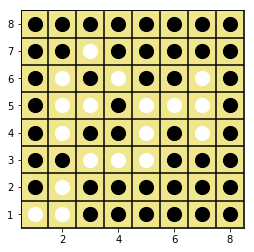

GAME OVER!!!

Player 2 win !!!


In [8]:
size=8
size=int(size)
black=1
white=2
empty=0

show_grid(size)

situation=initial(size,black,white)


count=0
while True:
    count+=1
    if count%2==1:
        position_final=victor_check(size,black,white,empty)
        
        if len(position_final)==0:
            print('GAME OVER!!!\n')
            print('Player 2 win !!!')
            break
        
        while True:

            coordinate= (input("輪到Player1(黑棋)，輸入座標:下棋(ex:3,4)\n輸入break:結束遊戲，輸入hint:查看可以下棋的座標\n"))
            if input_check(position_final,coordinate):
                renew_grid(situation,size,white,black,white)
                break
            elif coordinate=='hint':
                renew_grid(situation,size,white,black,white)
                print('你可以下的位置:')
                print(position_final)
            else:
                print('你輸入的內容有誤')
            
        if coordinate=='break':
            break

        renew_situation(coordinate,situation,size,black,white,empty)
        renew_grid(situation,size,black,black,white)
    
    elif count%2==0:
        position_final=victor_check(size,white,black,empty)
        
        if len(position_final)==0:
            print('GAME OVER!!!\n')
            print('Player 1 win !!!')
            break
        
        while True:

            coordinate= (input("輪到Player2(白棋)，輸入座標:下棋(ex:3,4)\n輸入break:結束遊戲，輸入hint:查看可以下棋的座標\n"))
            if input_check(position_final,coordinate):
                renew_grid(situation,size,white,black,white)
                break
            elif coordinate=='hint':
                renew_grid(situation,size,white,black,white)
                print('你可以下的位置:')
                print(position_final)
            else:
                print('你輸入的內容有誤')
                     
        if coordinate=='break':
            break

        renew_situation(coordinate,situation,size,white,black,empty)
        renew_grid(situation,size,white,black,white)